## 1. Data Loading and Initial Exploration

1.1 -Import necessary libraries and read the dataset:

In [33]:
# Import all the necessory libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
%matplotlib inline

import seaborn as sns#visualization
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import warnings
warnings.filterwarnings("ignore")

In [34]:
df_churn = pd.read_csv(r'/content/E-Commerce Churn Data.csv')

1.2 - Display the top 5 rows and bottom 5 of the dataframe

In [35]:
df_churn.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [36]:
df_churn.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


### 1.3 - Check for missing values:

In [37]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [38]:
df_churn.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


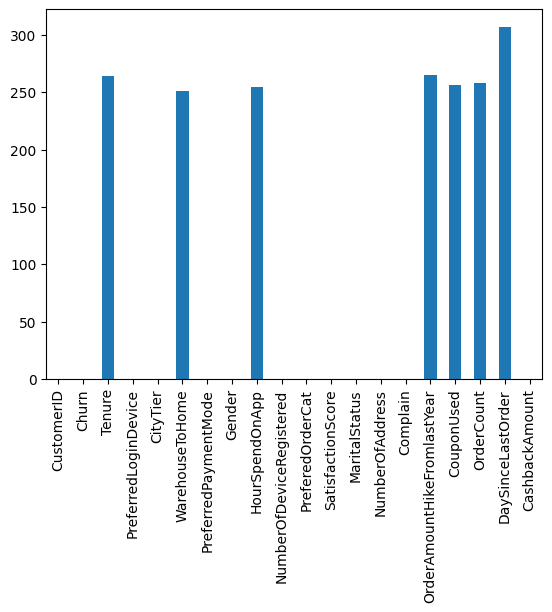

In [39]:
df_churn.isna().sum().plot(kind='bar')
plt.show()

## 2. Data Cleaning and Preprocessing

### 2.1 Handle missing values

In [40]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply (lambda x: len(x.unique()))
        info['unique values'] = df.apply (lambda x: x.unique())
        return info.sort_values('data type')

In [41]:
sniff_modified(df_churn)

,data type,percent missing,No. unique,unique values
CustomerID,int64,0.000000,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
Complain,int64,0.000000,2,"[1, 0]"
NumberOfAddress,int64,0.000000,15,"[9, 7, 6, 8, 3, 2, 4, 10, 1, 5, 19, 21, 11, 20..."
SatisfactionScore,int64,0.000000,5,"[2, 3, 5, 4, 1]"
NumberOfDeviceRegistered,int64,0.000000,6,"[3, 4, 5, 2, 1, 6]"
Churn,int64,0.000000,2,"[1, 0]"
CityTier,int64,0.000000,3,"[3, 1, 2]"
CashbackAmount,int64,0.000000,220,"[160, 121, 120, 134, 130, 139, 123, 127, 295, ..."
WarehouseToHome,float64,4.458259,35,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
HourSpendOnApp,float64,4.529307,7,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"


In [42]:
def FindMissingValues(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        #mean = sum / total
        pct = df[col].isnull().sum()*100
        if missing_vals > 0:
            print('{} => {} [{}%]'.format (col, df[col].isnull().sum(), round(pct, 2)))
            total += missing_vals

    if total == 0:
        print("no missing values found")

In [43]:
FindMissingValues(df_churn)

Tenure => 264 [26400%]
WarehouseToHome => 251 [25100%]
HourSpendOnApp => 255 [25500%]
OrderAmountHikeFromlastYear => 265 [26500%]
CouponUsed => 256 [25600%]
OrderCount => 258 [25800%]
DaySinceLastOrder => 307 [30700%]


In [44]:
df_churn_clean = df_churn.replace(" ", np.nan)

In [45]:
df_churn_clean = df_churn_clean.fillna(0)

### 2.2 Check for missing values after cleaning

In [46]:
df_churn_clean.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


In [47]:
df_churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## 3. Exploratory Data Analysis (EDA)

### 3.1 Visualize customer churn distribution

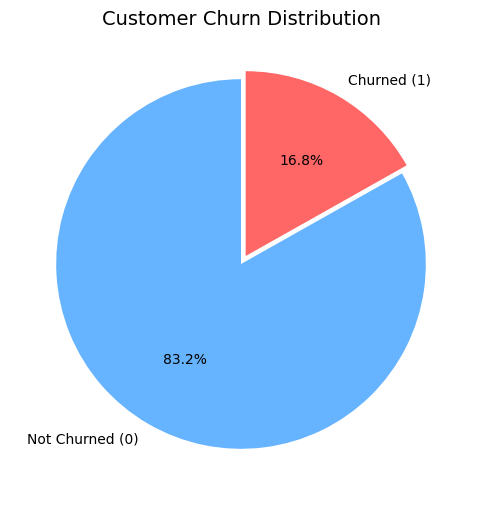

In [48]:
# Pie Chart of Customer Churn

churn_counts = df_churn_clean['Churn'].value_counts()

labels = ['Not Churned (0)', 'Churned (1)']
colors = ['#66b3ff','#ff6666']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0,0.05))
plt.title("Customer Churn Distribution", fontsize=14)
plt.show()


### 3.2 Analyze churn distribution by tenure

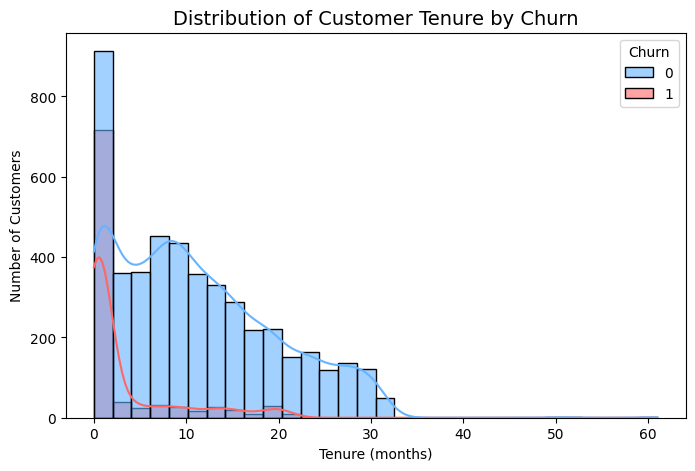

In [49]:
# -----------------------------
# Histogram of Tenure by Churn
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(data=df_churn_clean, x='Tenure', hue='Churn', bins=30, kde=True, palette=['#66b3ff','#ff6666'], alpha=0.6)
plt.title("Distribution of Customer Tenure by Churn", fontsize=14)
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


### 3.3 Analyze churn distribution by gender

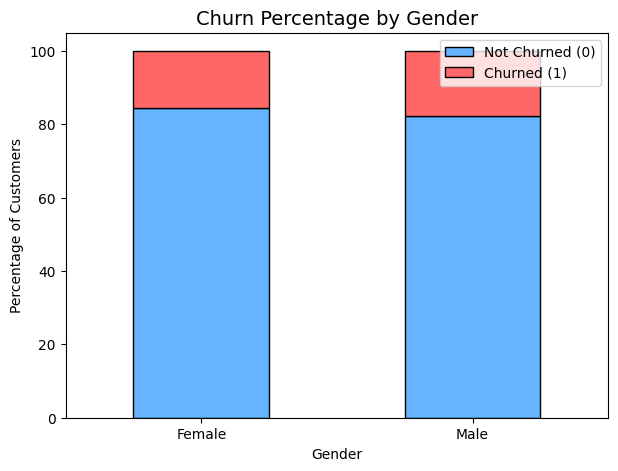

In [50]:
# -----------------------------
# Churn Distribution by Gender
# -----------------------------
gender_churn = pd.crosstab(df_churn_clean['Gender'], df_churn_clean['Churn'], normalize='index') * 100

gender_churn.plot(kind='bar', stacked=True, figsize=(7,5),
                  color=['#66b3ff','#ff6666'], edgecolor='black')

plt.title("Churn Percentage by Gender", fontsize=14)
plt.ylabel("Percentage of Customers")
plt.xlabel("Gender")
plt.legend(['Not Churned (0)', 'Churned (1)'])
plt.xticks(rotation=0)
plt.show()


### 3.4 Analyze churn by preferred payment mode

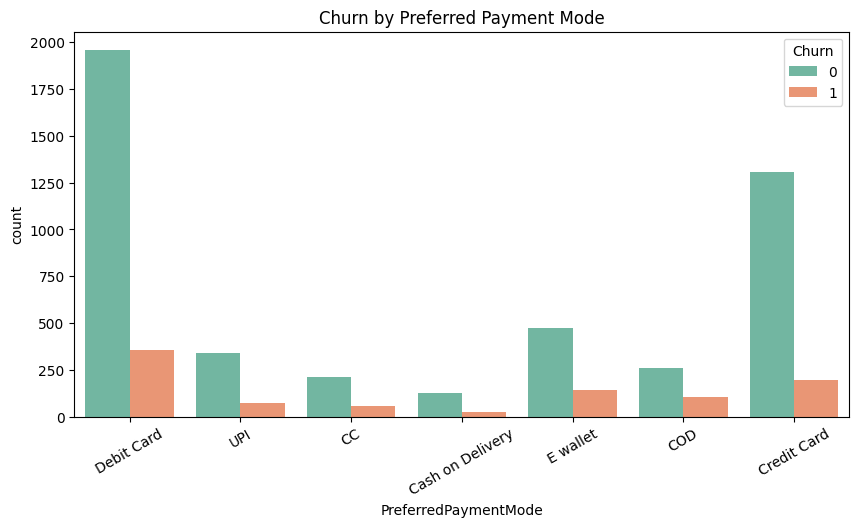

In [51]:
# payment mode customers are most loyal

plt.figure(figsize=(10,5))
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df_churn_clean, palette='Set2')
plt.title("Churn by Preferred Payment Mode")
plt.xticks(rotation=30)
plt.show()


### 3.5 Visualize correlation between numerical features

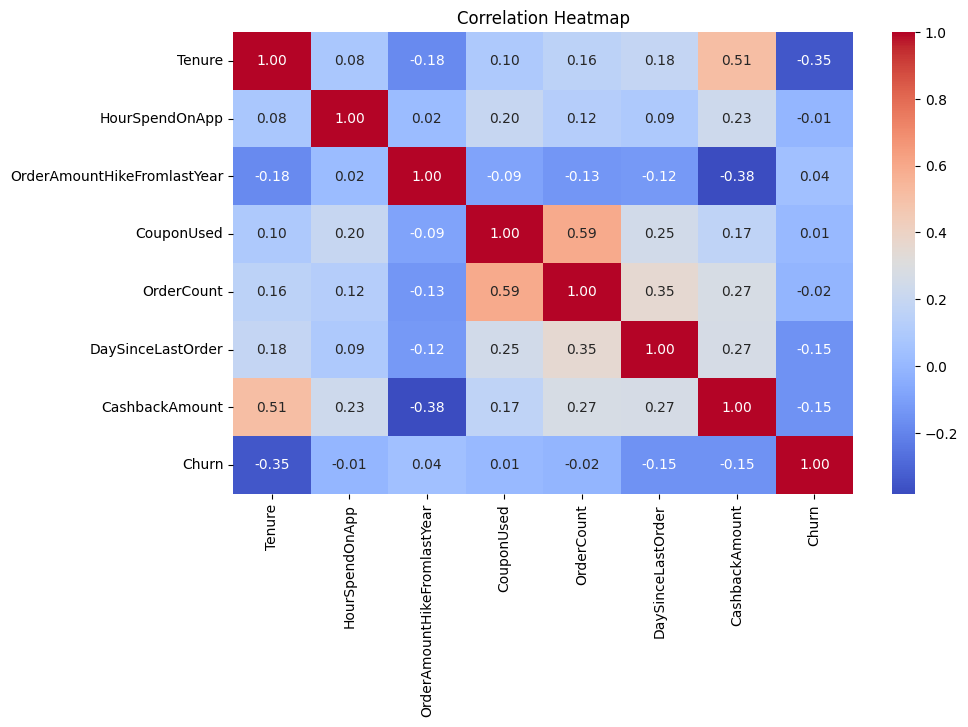

In [52]:
# which numerical features are most related to churn

num_cols = ['Tenure','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed',
            'OrderCount','DaySinceLastOrder','CashbackAmount','Churn']

corr = df_churn_clean[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### 3.6 Explore relationship between tenure and order count by churn

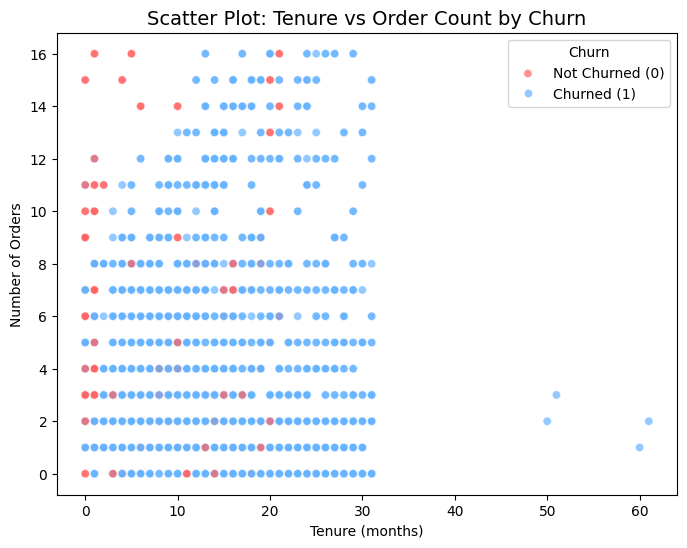

In [53]:
# Scatter Plot: Tenure vs OrderCount

plt.figure(figsize=(8,6))
sns.scatterplot(x='Tenure', y='OrderCount', hue='Churn',
                data=df_churn_clean, palette=['#66b3ff','#ff6666'], alpha=0.7)

plt.title("Scatter Plot: Tenure vs Order Count by Churn", fontsize=14)
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Orders")
plt.legend(title="Churn", labels=["Not Churned (0)", "Churned (1)"])
plt.show()

## 4. Model Building and Evaluation

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


# Customer Churn Analysis

### 4.1 Prepare data for modeling

In [55]:
df_churn_model = df_churn_clean.copy()

In [56]:
cat_cols = df_churn_model.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df_churn_model[col] = le.fit_transform(df_churn_model[col])

### 4.2 Split data into training and testing sets

In [57]:
X = df_churn_model.drop(columns=['CustomerID','Churn'])
y = df_churn_model['Churn']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

### 4.3 Train and evaluate Logistic Regression model

In [59]:
#  Logistic Regression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       936
           1       0.68      0.45      0.54       190

    accuracy                           0.87      1126
   macro avg       0.79      0.70      0.73      1126
weighted avg       0.86      0.87      0.86      1126



### 4.4 Evaluate Logistic Regression model with confusion matrix

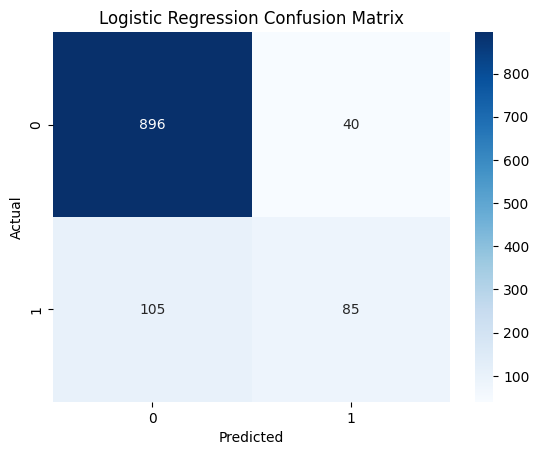

In [60]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 4.5 Train and evaluate Decision Tree model

In [61]:
# Decision Tree

dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

print("📊 Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))

📊 Decision Tree Results:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       936
           1       0.84      0.52      0.64       190

    accuracy                           0.90      1126
   macro avg       0.88      0.75      0.79      1126
weighted avg       0.90      0.90      0.89      1126



### 4.6 Evaluate Decision Tree model with confusion matrix

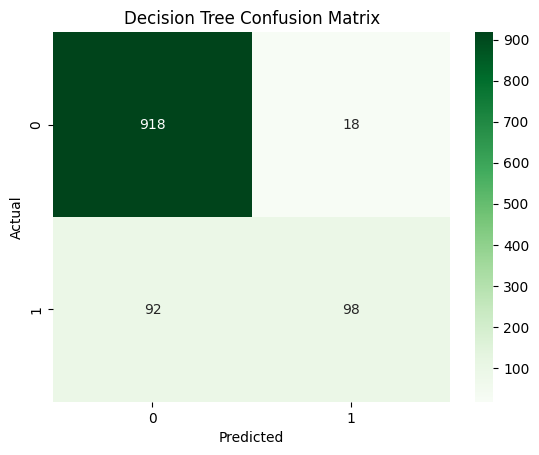

In [62]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 4.7 Visualize the Decision Tree

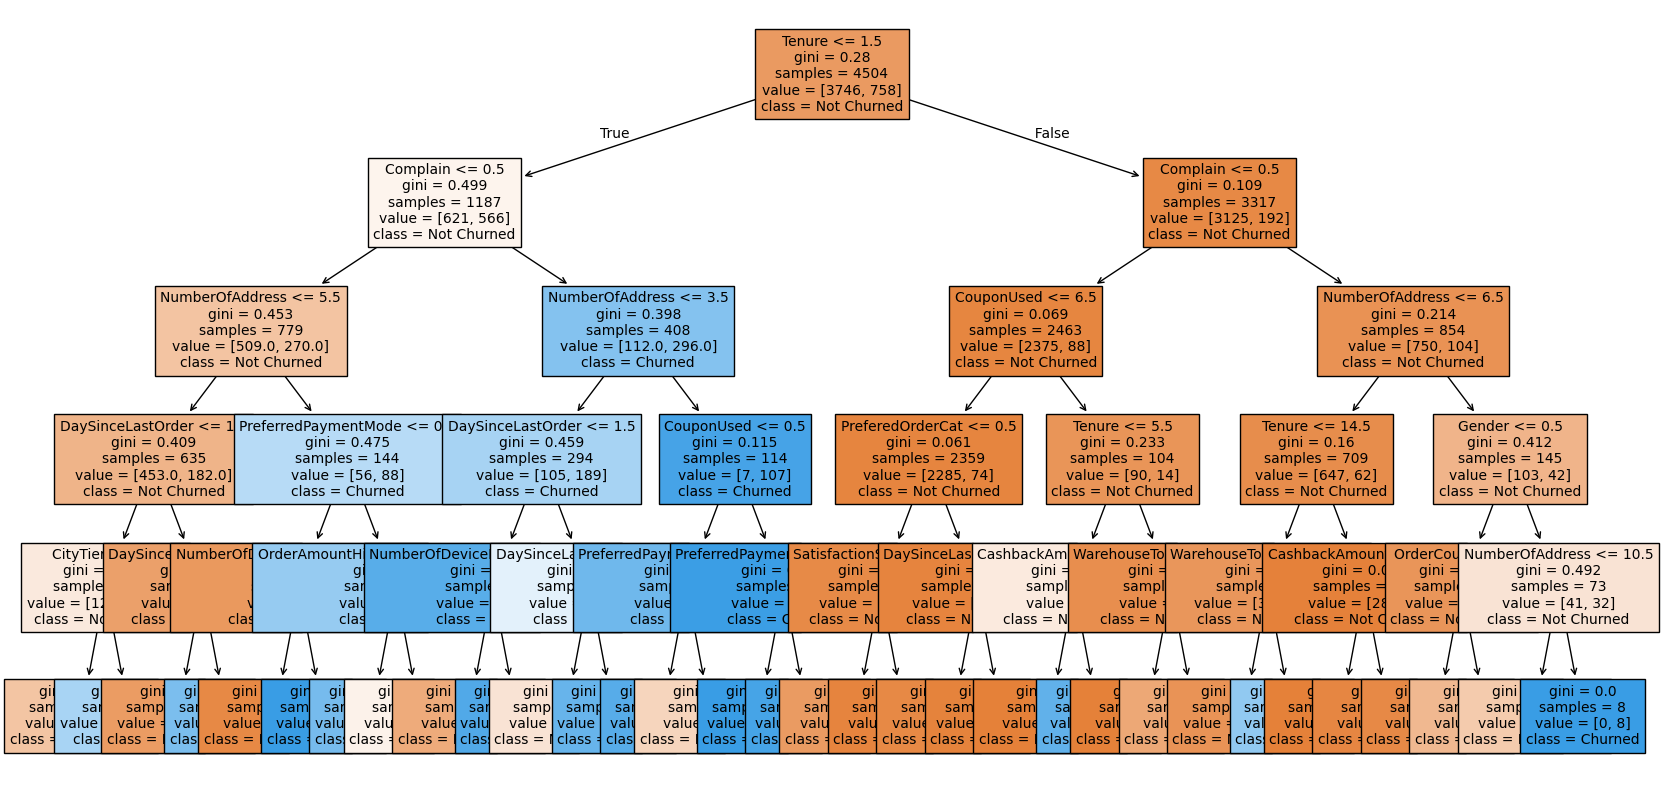

In [63]:
#  Visualize Decision Tree (Optional)

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=['Not Churned','Churned'], filled=True, fontsize=10)
plt.show()